# 2 Regularized logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import path
import matplotlib.patches as patches
from utils import *

In [2]:
data = pd.read_csv('../data/ex2data2.txt', header=None)
data.columns = ['test1', 'test2', 'accept']
data.head()

,test1,test2,accept
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## 2.1 Visualizing the data

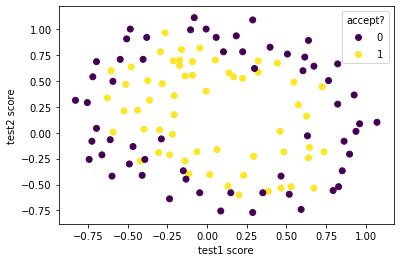

In [3]:
scatter = plt.scatter('test1','test2', c='accept', data=data)
plt.gca().legend(*scatter.legend_elements(), title="accept?")
plt.xlabel('test1 score')
plt.ylabel('test2 score')
plt.show()

## 2.2 Feature mapping

## 2.3 Cost function and gradient

In [4]:
X,y = get_data(data)
X = map_feature(X)
init_theta = np.zeros(X.shape[1])
l = 1 # lambda 

op_result = minimize(cost_function, init_theta , args=(X,y,l), jac=compute_grad, method='L-BFGS-B')
op_result.success

True

## 2.4 Plotting the decision boundary

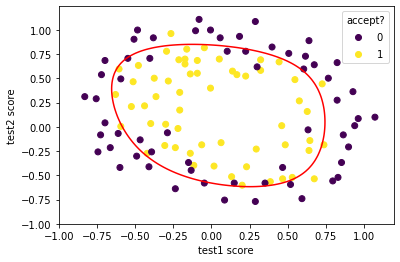

In [5]:
resulution = 100
test1_range = np.linspace(-1,1,resulution)
test2_range = np.linspace(-1,1,resulution)

xx,yy = np.meshgrid(test1_range, test2_range)

X_polt = np.c_[np.ones(resulution**2), xx.ravel(), yy.ravel()]

X_plot_poly = map_feature(X_polt)

Z = X_plot_poly.dot(op_result.x).reshape(xx.shape)


plt.contour(xx, yy, Z, [0], colors='red')

scatter = plt.scatter('test1','test2', c='accept', data=data)
plt.gca().legend(*scatter.legend_elements(), title="accept?")
plt.xlabel('test1 score')
plt.ylabel('test2 score')
plt.show()

In [6]:
acc = 1-(np.abs((X.dot(op_result.x)>0)-y).sum()/len(y))
print('The accuracy is: ' + str(acc))

The accuracy is: 0.8305084745762712
